In [5]:
from gerrychain import Graph, Partition, Election
from gerrychain.updaters import Tally, cut_edges

graph = Graph.from_json("./PA_VTDs.json")

election = Election("SEN12", {"Dem": "USS12D", "Rep": "USS12R"})

initial_partition = Partition(
    graph,
    assignment="CD_2011",
    updaters={
        "cut_edges": cut_edges,
        "population": Tally("TOTPOP", alias="population"),
        "SEN12": election
    }
)

In [6]:
for district, pop in initial_partition["population"].items():
     print("District {}: {}".format(district, pop))

District 3: 705317
District 5: 706258
District 10: 705327
District 9: 705679
District 12: 705698
District 6: 705782
District 15: 705549
District 7: 706391
District 16: 705629
District 11: 705883
District 4: 705669
District 8: 705689
District 17: 705830
District 18: 705847
District 14: 705526
District 13: 705028
District 2: 705689
District 1: 705588


In [8]:
from gerrychain import MarkovChain
from gerrychain.constraints import single_flip_contiguous
from gerrychain.proposals import propose_random_flip
from gerrychain.accept import always_accept

chain = MarkovChain(
    proposal=propose_random_flip,
    constraints=[single_flip_contiguous],
    accept=always_accept,
    initial_state=initial_partition,
    total_steps=1000
)

In [9]:
for partition in chain:
    print(sorted(partition["SEN12"].percents("Dem")))

[0.3939965795760288, 0.4075582940348155, 0.427856693075198, 0.43845789169859267, 0.44859507442064817, 0.45562985141089074, 0.46112300747692175, 0.4722449543958699, 0.4749233455536996, 0.5042059392595655, 0.505002022794258, 0.5120524365064261, 0.5170020396913225, 0.5769630056499988, 0.6890607811083572, 0.7164031002129045, 0.8408878021339727, 0.9132545473358428]
[0.3939965795760288, 0.4075582940348155, 0.427856693075198, 0.43845789169859267, 0.44859507442064817, 0.45562985141089074, 0.46112300747692175, 0.4722449543958699, 0.4749233455536996, 0.5042059392595655, 0.5052716151390395, 0.511767479440001, 0.5170020396913225, 0.5769630056499988, 0.6890607811083572, 0.7164031002129045, 0.8408878021339727, 0.9132545473358428]
[0.3937004125652807, 0.4075582940348155, 0.427856693075198, 0.43845789169859267, 0.44859507442064817, 0.45578654699416454, 0.46112300747692175, 0.4722449543958699, 0.4749233455536996, 0.5042059392595655, 0.5052716151390395, 0.511767479440001, 0.5170020396913225, 0.576963005

[0.39358989529426847, 0.41046484881560624, 0.4258334103544766, 0.4380447279044484, 0.4511937983028702, 0.45611929449142335, 0.4604370709301033, 0.4741906273939271, 0.4753716852565283, 0.5028559606974714, 0.504676249856165, 0.5149631865500497, 0.5182769185687373, 0.5747864756566095, 0.6884003545951978, 0.7158364180442337, 0.8417106659672996, 0.9134860058752481]
[0.39358989529426847, 0.41046484881560624, 0.4258334103544766, 0.43767685863346684, 0.4511937983028702, 0.45611929449142335, 0.4604370709301033, 0.4746931685925907, 0.4753716852565283, 0.5028559606974714, 0.504676249856165, 0.5149631865500497, 0.5182769185687373, 0.5747864756566095, 0.6884003545951978, 0.7158364180442337, 0.8417106659672996, 0.9134860058752481]
[0.39358989529426847, 0.41046484881560624, 0.4258334103544766, 0.43767685863346684, 0.4511937983028702, 0.45611929449142335, 0.4604370709301033, 0.4746931685925907, 0.4753716852565283, 0.5028559606974714, 0.504676249856165, 0.5149631865500497, 0.5182769185687373, 0.5747864

[0.39368775448470344, 0.41021270836719126, 0.4264679511960489, 0.43970021640151524, 0.4522102295116664, 0.4565318921622425, 0.4597997642337734, 0.47226665959367015, 0.4773825389950791, 0.5026016993246876, 0.5042168722456466, 0.5158870192777595, 0.5181181765105903, 0.5758273283826433, 0.68610644022008, 0.7150063189895673, 0.8418290836273389, 0.9130455969083926]
[0.39368775448470344, 0.41021270836719126, 0.4265328519829478, 0.43970021640151524, 0.45213759948537985, 0.4565318921622425, 0.4597997642337734, 0.47226665959367015, 0.4773825389950791, 0.5026016993246876, 0.5042168722456466, 0.5158870192777595, 0.5181181765105903, 0.5758273283826433, 0.68610644022008, 0.7150063189895673, 0.8418290836273389, 0.9130455969083926]
[0.39368775448470344, 0.4099280301524833, 0.4265328519829478, 0.43970021640151524, 0.45213759948537985, 0.4565318921622425, 0.4597997642337734, 0.47226665959367015, 0.4773825389950791, 0.5026016993246876, 0.5042168722456466, 0.5158870192777595, 0.5181181765105903, 0.575925

[0.3940546700606798, 0.41251154993319133, 0.4240350042668096, 0.44032410659609345, 0.4529677726203672, 0.4581172932709615, 0.4583902401601408, 0.4715999249910074, 0.4761564889502926, 0.5031703203184235, 0.5050407286578205, 0.5157884496932441, 0.5182358645117456, 0.5725754994929344, 0.6864970817020527, 0.7137944264171918, 0.838958873556895, 0.9126723323180295]
[0.3940546700606798, 0.41251154993319133, 0.4240350042668096, 0.44032410659609345, 0.4529677726203672, 0.4581172932709615, 0.4583902401601408, 0.4715999249910074, 0.4761564889502926, 0.5031703203184235, 0.5050407286578205, 0.5157884496932441, 0.518377344768425, 0.5725754994929344, 0.686012352369986, 0.7137944264171918, 0.838958873556895, 0.9126723323180295]
[0.3940546700606798, 0.41251154993319133, 0.4240350042668096, 0.44032410659609345, 0.4529677726203672, 0.4581172932709615, 0.4583902401601408, 0.4715999249910074, 0.4761564889502926, 0.5031703203184235, 0.5050407286578205, 0.5161131540930037, 0.518377344768425, 0.57257549949293

[0.39505237530717097, 0.4154942742863322, 0.425710482748733, 0.44094035459297654, 0.4524750513149812, 0.45660607569373934, 0.45792086426722334, 0.4707273872252932, 0.47314218033892497, 0.5027036556459131, 0.5045205892404999, 0.5182717429879886, 0.5188829517909774, 0.5733214345414098, 0.6848520558404625, 0.7144764343534283, 0.8362856208316448, 0.9141751613146069]
[0.39505237530717097, 0.4154942742863322, 0.425710482748733, 0.44094035459297654, 0.4524750513149812, 0.45660607569373934, 0.45792086426722334, 0.4707273872252932, 0.4724032984978666, 0.5027036556459131, 0.5045205892404999, 0.5188829517909774, 0.5189754398815688, 0.5733214345414098, 0.6848520558404625, 0.7144764343534283, 0.8362856208316448, 0.9141751613146069]
[0.39505237530717097, 0.4154942742863322, 0.425710482748733, 0.4403745674693084, 0.4524750513149812, 0.45660607569373934, 0.45792086426722334, 0.47163024441521634, 0.4724032984978666, 0.5027036556459131, 0.5045205892404999, 0.5188829517909774, 0.5189754398815688, 0.57332

[0.39526829949453085, 0.4166076948505346, 0.42325047974171753, 0.4411528623144377, 0.45340740563792686, 0.45716308780970627, 0.4577362953353533, 0.46915247154984496, 0.47019590031815045, 0.5021051735723937, 0.5060181318139982, 0.5194986098227996, 0.5233140712525992, 0.5726310976344602, 0.6828625801696986, 0.7147019736165002, 0.8313660159126621, 0.9162323012881372]
[0.39522598320843455, 0.4166076948505346, 0.42325047974171753, 0.4411528623144377, 0.45340740563792686, 0.4571759848873091, 0.4577362953353533, 0.46915247154984496, 0.47019590031815045, 0.5021051735723937, 0.5060181318139982, 0.5194986098227996, 0.5233140712525992, 0.5726310976344602, 0.6828625801696986, 0.7147019736165002, 0.8313660159126621, 0.9162323012881372]
[0.39522598320843455, 0.4166076948505346, 0.42325047974171753, 0.4411528623144377, 0.45340740563792686, 0.4571759848873091, 0.4577362953353533, 0.46915247154984496, 0.47019590031815045, 0.5021051735723937, 0.5060181318139982, 0.5194986098227996, 0.5233140712525992, 0

[0.3944720563439283, 0.4163163766381575, 0.42463653739921847, 0.4417342226306521, 0.4534396708687437, 0.45750071742792536, 0.4579410576338902, 0.46814515006197616, 0.4731209784950445, 0.5025450657538179, 0.5029931714433826, 0.5190839874096779, 0.5224540822432379, 0.5710157793593861, 0.6852446749622294, 0.7149240319240692, 0.8300503747304114, 0.9152492356428246]
[0.3944720563439283, 0.4163350133455907, 0.4246333275114829, 0.4417342226306521, 0.4534396708687437, 0.45750071742792536, 0.4579410576338902, 0.46814515006197616, 0.4731209784950445, 0.5025450657538179, 0.5029931714433826, 0.5190839874096779, 0.5224540822432379, 0.5710157793593861, 0.6852446749622294, 0.7149240319240692, 0.8300503747304114, 0.9152492356428246]
[0.3944720563439283, 0.4163350133455907, 0.4246333275114829, 0.4417342226306521, 0.4534396708687437, 0.45750071742792536, 0.4579410576338902, 0.46814515006197616, 0.4731209784950445, 0.5025450657538179, 0.5029931714433826, 0.5190839874096779, 0.5224540822432379, 0.57101577

In [10]:
import pandas

d_percents = [sorted(partition["SEN12"].percents("Dem")) for partition in chain]

data = pandas.DataFrame(d_percents)

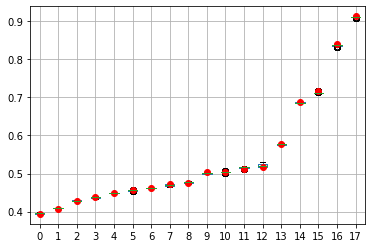

In [11]:
import matplotlib.pyplot as plt

ax = data.boxplot(positions=range(len(data.columns)))
plt.plot(data.iloc[0], "ro")

plt.show()